In [4]:
titanic = read.csv("titanic.csv")
library(ggplot2)
titanic$Pclass = factor(titanic$Pclass)
titanic$Survived = factor(titanic$Survived)

#1.	Check if there is any missing data

In [5]:
sum(is.na(titanic))
sum(is.na(titanic$Age))

[1] 177

[1] 177

#2.	Replace missing values by the variable's average  for numeric variables
#3.	Remove the rows that have missing categorical values 

In [6]:
titanic[is.na(titanic$Age),]$Age = mean(titanic$Age, na.rm=TRUE)

#4.	Remove columns: names, ID and unnecessary columns 

In [7]:
titanic$PassengerId = NULL
titanic$Name = NULL
titanic$Ticket = NULL
titanic$Cabin = NULL

#5.	Calculate the mean age

In [8]:
mean(titanic$Age)

[1] 29.69912

#6.	Calculate the mean age of female passengers

In [9]:
mean(titanic[titanic$Sex == "female",]$Age)

[1] 28.21673

#7.	Calculate the median fare of the passengers in Class 1

In [10]:
median(titanic[titanic$Pclass == 1,]$Fare)

[1] 60.2875

#8.	Calculate the median fare of the female passengers that are not in Class 1

In [11]:
median(titanic[(titanic$Pclass != 1) & (titanic$Sex == "female"),]$Fare)

[1] 14.45625

#9.	Calculate the median age of survived passengers who are female and Class 1 or Class 2, 

In [12]:
median(titanic[(titanic$Pclass != 3) & (titanic$Survived == 1) & 
                 (titanic$Sex == "female"),]$Age)

[1] 30

#10.	Calculate the mean fare of female teenagers survived passengers

In [13]:
mean(titanic[(titanic$Survived == 1) & (titanic$Age >= 13) & (titanic$Age <= 19),]$Fare)

[1] 46.6062

#11.	Calculate the mean fare of female teenagers survived passengers for each class

In [14]:
mean(titanic[(titanic$Survived == 1) & (titanic$Age >= 13) & (titanic$Age <= 19) & (titanic$Pclass == 1),]$Fare)
mean(titanic[(titanic$Survived == 1) & (titanic$Age >= 13) & (titanic$Age <= 19) & (titanic$Pclass == 2),]$Fare)
mean(titanic[(titanic$Survived == 1) & (titanic$Age >= 13) & (titanic$Age <= 19) & (titanic$Pclass == 3),]$Fare)

[1] 107.7795

[1] 18.95231

[1] 8.634906

#12.	Calculate the ratio of Survived and not Survived for passengers who are who pays more than the average fare

In [15]:
sum(titanic[titanic$Fare > mean(titanic$Fare),]$Survived == 1)/ sum(titanic[titanic$Fare > mean(titanic$Fare),]$Survived == 0)

[1] 1.482353

#13.	Add column that standardizes the fare (subtract the mean and divide by standard deviation) and name it sfare

In [16]:
titanic$sfare = (titanic$Fare-mean(titanic$Fare))/sd(titanic$Fare)

#14.	Plot the bar chart of two variables: Sex and Survived for passengers younger than the average age

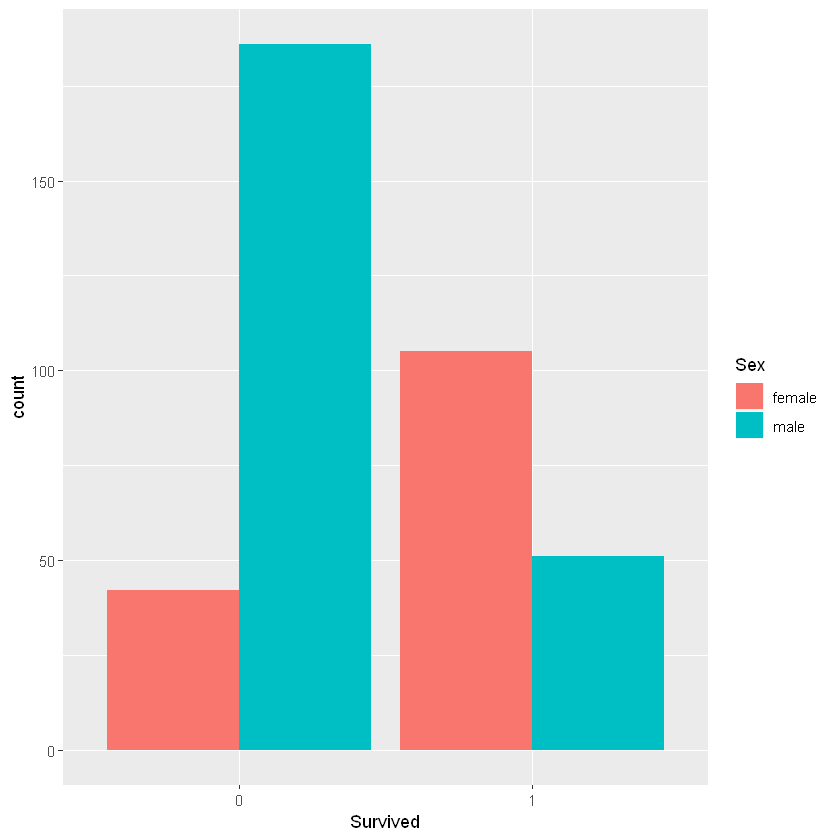

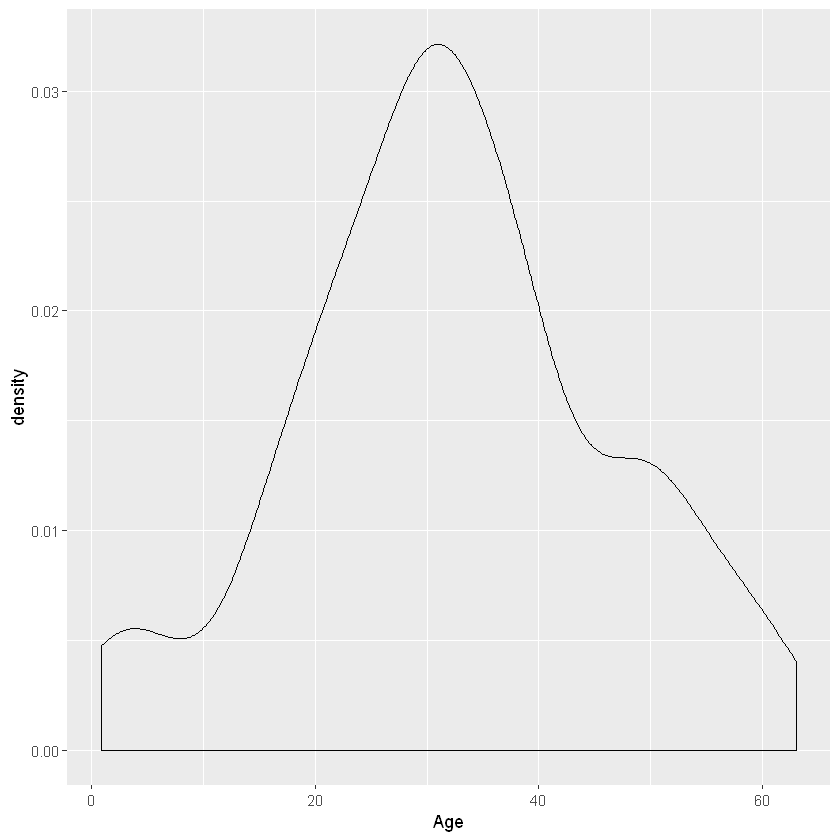

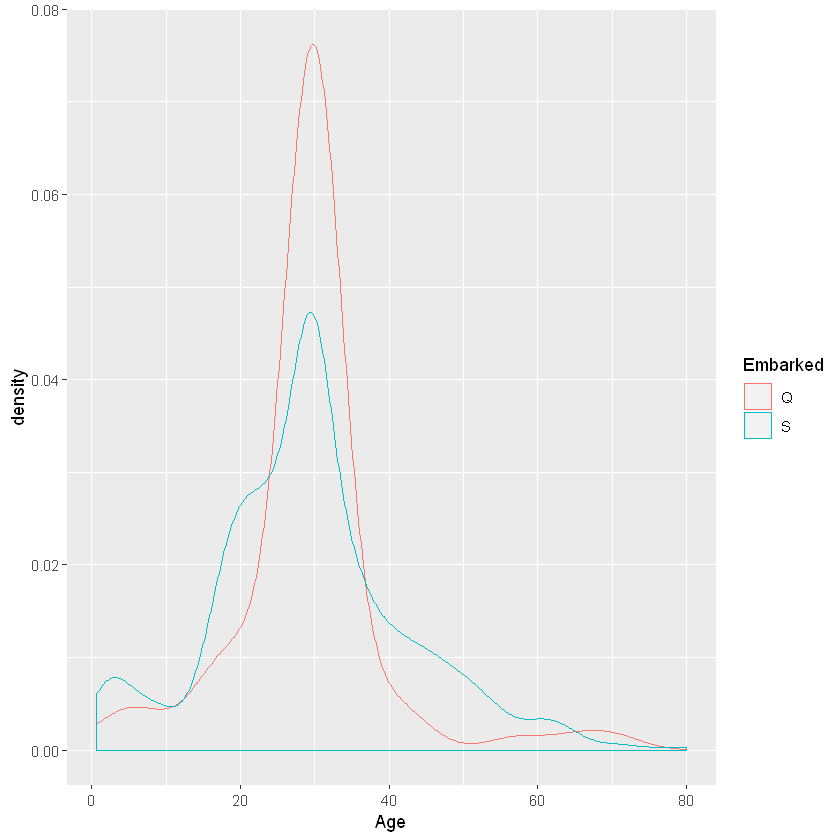

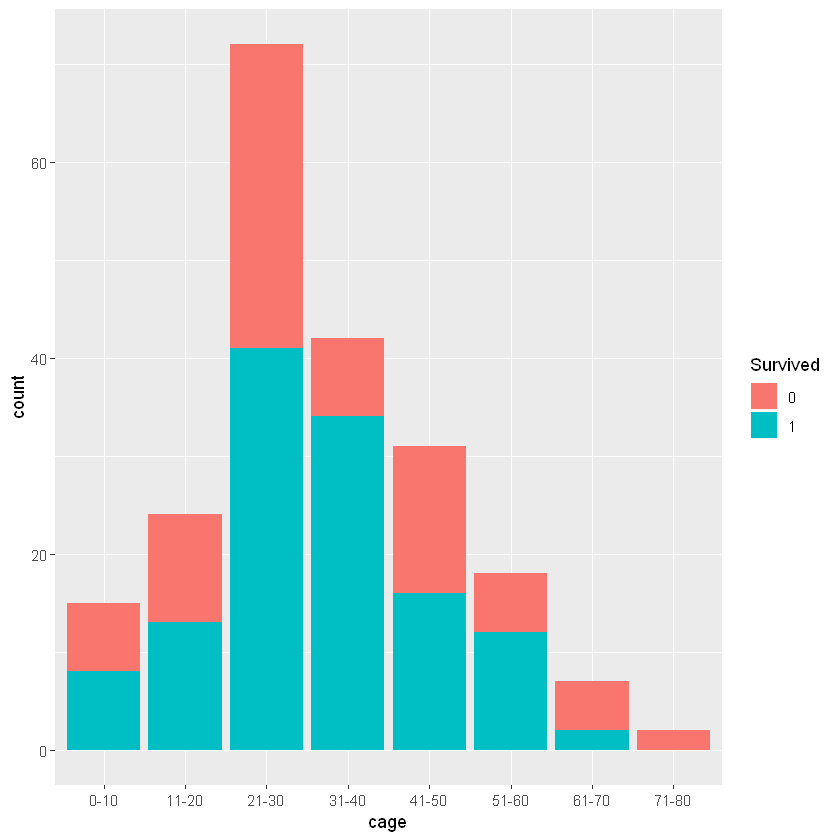

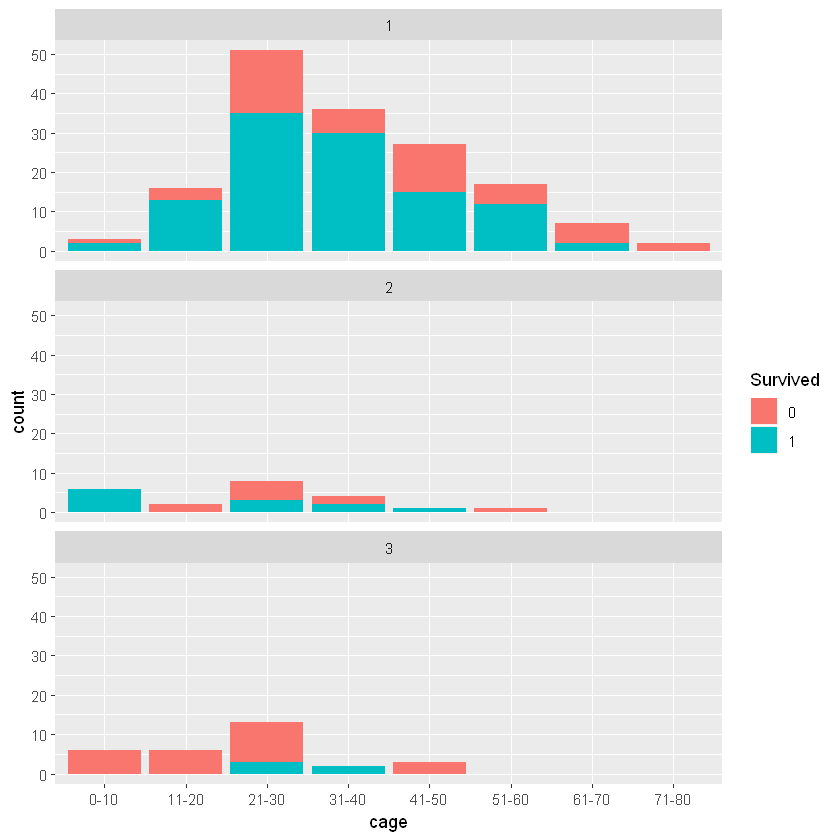

In [17]:
ggplot(titanic) + 
  geom_bar(data = titanic[titanic$Age < mean(titanic$Age),], mapping = aes(x = Survived, fill = Sex), position = "dodge")

##15.	Plot the density of age of passengers who survived and pay more than the average fare
ggplot(titanic) + 
  geom_density(data = titanic[(titanic$Fare > mean(titanic$Fare)) 
              & (titanic$Survived == 1),], mapping = aes(x = Age))

##16.	Plot two density curves in one graph of passengers embarked in Southampton and Queenstown
ggplot(titanic) + geom_density(data = titanic[(titanic$Embarked == "S") | (titanic$Embarked == "Q"),], mapping = aes(x = Age, color = Embarked))

##17.	Add categorical variable named "cfare" that takes value "cheap" for passengers paying less the average fare and takes value "expensive" for passengers paying more than the average fare. 
titanic$cfare[titanic$Fare<mean(titanic$Fare)] <- "cheap" 
titanic$cfare[titanic$Fare>mean(titanic$Fare)] <- "expensive"

##18.	Add categorical variable named "cage" that takes value 0 for age 0-10, 1 for age 10-20, 2 for age 20-30, and so on
titanic$cage[titanic$Age<=10] <- "0-10"
titanic$cage[titanic$Age>10 & titanic$Age<=20] <- "11-20"
titanic$cage[titanic$Age>20 & titanic$Age<=30] <- "21-30"
titanic$cage[titanic$Age>30 & titanic$Age<=40] <- "31-40"
titanic$cage[titanic$Age>40 & titanic$Age<=50] <- "41-50"
titanic$cage[titanic$Age>50 & titanic$Age<=60] <- "51-60"
titanic$cage[titanic$Age>60 & titanic$Age<=70] <- "61-70"
titanic$cage[titanic$Age>70 & titanic$Age<=80] <- "71-80"
titanic$cage[titanic$Age>80 & titanic$Age<=90] <- "81-90"

##19.	Plot bar chart of two variables cage and Survived for passengers paying more than the average
ggplot(titanic) + 
  geom_bar(data = titanic[titanic$cfare == "expensive",], mapping = aes(x = cage, fill = Survived))

##20.	Split the bar chart in 19 by Pclass.
ggplot(titanic) + 
  geom_bar(data = titanic[titanic$cfare == "expensive",], mapping = aes(x = cage, fill = Survived)) + facet_wrap(~ Pclass, nrow = 3)